In [1]:
# installations
! pip install scikit-learn==1.5.2
! pip install --upgrade XGBoost
!pip install keras_tuner
! pip install shap
! pip install lime
!pip install google-generativeai langchain-google-genai



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 114.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=c7a45256a2cf148137aac7d5689e161c033883c5c935f790462428e52821267e
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 2.7 MB/s eta 0:00:00


In [ ]:
# Restart session after installations
import os
os._exit(00)


In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

**Dataset used:** Mental Health in Tech Survey dataset.

**Link:** https://www.kaggle.com/datasets/osmi/mental-health-in-tech-survey

In [2]:
# Load the dataset
df=pd.read_csv('/content/survey.csv')

**Initial Insights Into the Data and Exploratory Data Analysis:**

In [3]:
# View some samples of the dataset
df.sample(15)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
1179,2014-09-26 10:05:55,25,female,Bulgaria,UT,No,No,Yes,Sometimes,26-100,...,Don't know,Maybe,Maybe,Yes,Some of them,Maybe,No,No,No,NaN
539,2014-08-27 17:56:50,22,Female,United States,CA,No,Yes,Yes,Sometimes,500-1000,...,Don't know,No,No,Some of them,Some of them,No,No,No,Yes,NaN
600,2014-08-27 22:32:36,29,Male,United States,CA,No,Yes,No,Often,100-500,...,Don't know,No,No,Some of them,Yes,No,No,Don't know,No,NaN
673,2014-08-28 08:00:40,26,female,Israel,NaN,No,Yes,No,Never,100-500,...,Don't know,Maybe,No,Some of them,No,No,No,Yes,No,NaN
1025,2014-08-29 10:16:45,42,M,United States,CA,No,Yes,Yes,Sometimes,6-25,...,Don't know,Maybe,Maybe,Some of them,Some of them,No,No,Don't know,No,NaN
815,2014-08-28 14:31:00,39,Female,United States,WA,No,No,No,Sometimes,26-100,...,Don't know,Yes,No,No,No,No,Yes,Don't know,No,NaN
322,2014-08-27 14:28:49,32,Male,United States,OR,No,No,No,Never,500-1000,...,Somewhat easy,No,No,Some of them,Yes,Maybe,Maybe,Yes,No,NaN
1157,2014-09-02 20:23:49,31,male,United Kingdom,NaN,No,Yes,Yes,Never,6-25,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,When I've had a depression I was lucky to have...
316,2014-08-27 14:27:27,29,M,United States,NY,No,No,No,NaN,100-500,...,Don't know,Maybe,No,No,No,No,Maybe,Don't know,No,NaN
259,2014-08-27 13:49:15,25,Male,Australia,NaN,No,Yes,Yes,Often,6-25,...,Very difficult,Yes,Maybe,No,No,No,Yes,No,Yes,NaN


In [4]:
# Shape of the dataset
df.shape

(1259, 27)

**Observation:** The dataset has 1259 rows and 27 columns.

In [5]:
# Display the columns and the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

**Observations:**
* There are 27 columns present in the dataset.
* Except the 'Age' column, all  the  other columns have the data type='object' which means  those are categorical in nature and 'Age' is numerical in nature.
* There are missing values present in 'state', 'work_interfere' and 'comments'.


In [6]:
# Summary statistics
df.describe()


,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


In [7]:
print(df["Age"].unique())

[         37          44          32          31          33          35
          39          42          23          29          36          27
          46          41          34          30          40          38
          50          24          18          28          26          22
          19          25          45          21         -29          43
          56          60          54         329          55 99999999999
          48          20          57          58          47          62
          51          65          49       -1726           5          53
          61           8          11          -1          72]


**Observations:**
* Unrealistic values are observed in the 'Age' column- Negative values ( -29, 1726, -1) , Low values for a workplace ( 5, 8, 11), Extremely high values ( 329, 99999999999)
* We will replace these values with 'NaN' and treat them as missing values. And while handling the missing values, we would replace these with the median

In [8]:
# Identify problematic ages
invalid_ages = [-1, -29, -1726, 329, 99999999999, 5, 8, 11]

# Convert these values to NaN
df["Age"] = df["Age"].replace(invalid_ages, np.nan)

In [9]:
# Check for missing values
df.isnull().sum()

,0
Timestamp,0
Age,8
Gender,0
Country,0
state,515
self_employed,18
family_history,0
treatment,0
work_interfere,264
no_employees,0


**Observations:**
* There are 515 missing values in 'state' column.
* 'self_employed' has 18 missing values.
* 'work_interfere' column has 264 missing values.
* 'comments' has 1095 missing values.
* 8 missing values in 'Age' column.

In [10]:
df['Gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)



**Observations:** The 'Gender' column contains highly inconsistent and  diverse responses, making it difficult to standardize effectively. This makes the preprocessing step very complex along with the potential risk of introducing bias. Hence, we will drop this feature to ensure that the model focues on more reliable predictiors.

In [11]:
df.duplicated().sum()

0

**Observations:** There are no duplicated values in the dataset.

**Data Cleaning:**

**Drop irrelevant columns:**

Since, the objective of the task to predict possible mental health conditions based on user-provided symptoms,
* We will drop columns 'Timestamp', 'Country', 'state', 'comments'since they are irrelevant for prediction.
* Columns like 'self_employed', 'no_employees', 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity','leave' are not direct symptoms for predicting mental health conditions but relate to workplace environment and employer policies. Hence their impact will be evaluated using feature importance methods.
* We wil also drop 'Gender' as stated previously.

In [12]:
# Drop unnecessary columns
columns_to_drop = ["Timestamp", "Country", "state", "comments", 'Gender']
df = df.drop(columns=columns_to_drop, axis=1)

# Display the updated dataframe
df.head()

,Age,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37.0,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44.0,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32.0,NaN,No,No,Rarely,6-25,No,Yes,No,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31.0,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31.0,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


**Handle missing values:**

In [13]:
# Fill missing values with the most frequent category (mode)
df['work_interfere'].fillna(df['work_interfere'].mode()[0], inplace=True)
df['self_employed'].fillna(df['self_employed'].mode()[0], inplace=True)

# Fill NaN values with the median age
median_age = df["Age"].median()
df["Age"].fillna(median_age, inplace=True)



# Display the updated dataframe
print(df['work_interfere'].value_counts())
print(df['self_employed'].value_counts())
print(df["Age"].describe())

work_interfere
Sometimes    729
Never        213
Rarely       173
Often        144
Name: count, dtype: int64
self_employed
No     1113
Yes     146
Name: count, dtype: int64
count    1259.000000
mean       32.069897
std         7.265565
min        18.000000
25%        27.000000
50%        31.000000
75%        36.000000
max        72.000000
Name: Age, dtype: float64


In [14]:
df.isnull().sum()

,0
Age,0
self_employed,0
family_history,0
treatment,0
work_interfere,0
no_employees,0
remote_work,0
tech_company,0
benefits,0
care_options,0


**Data Visualization:**

**Univariate Analysis:**

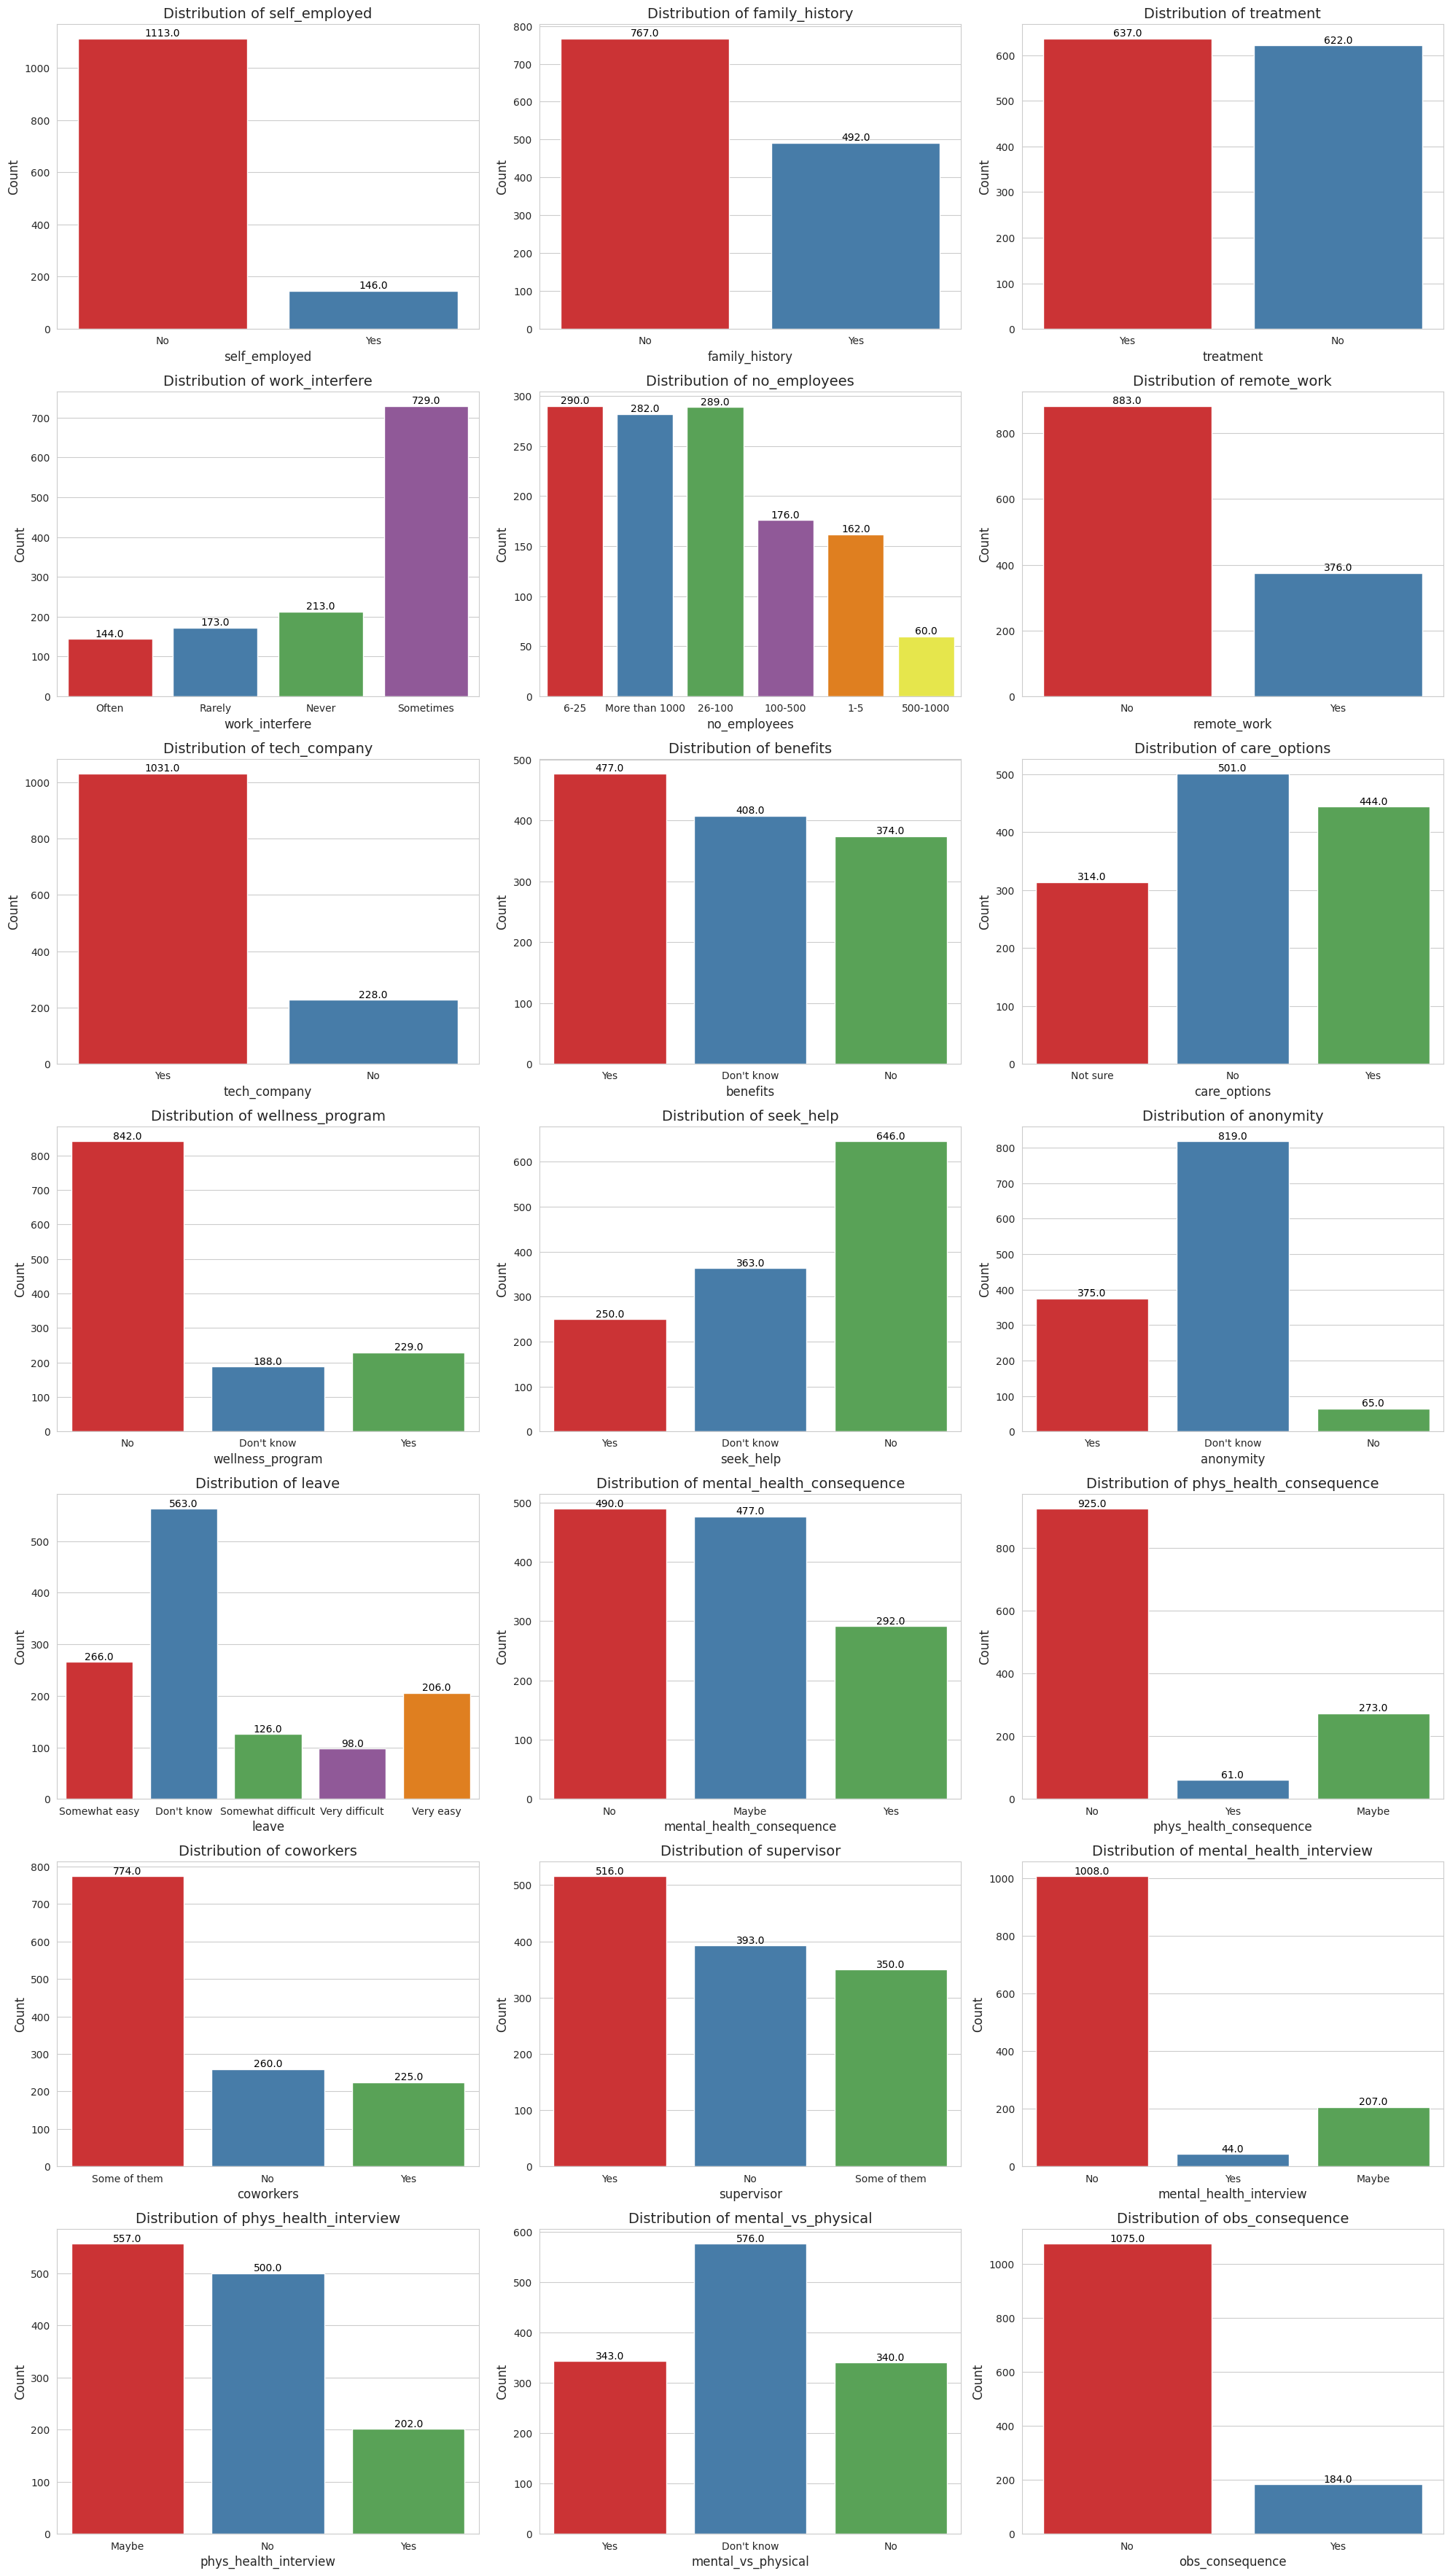

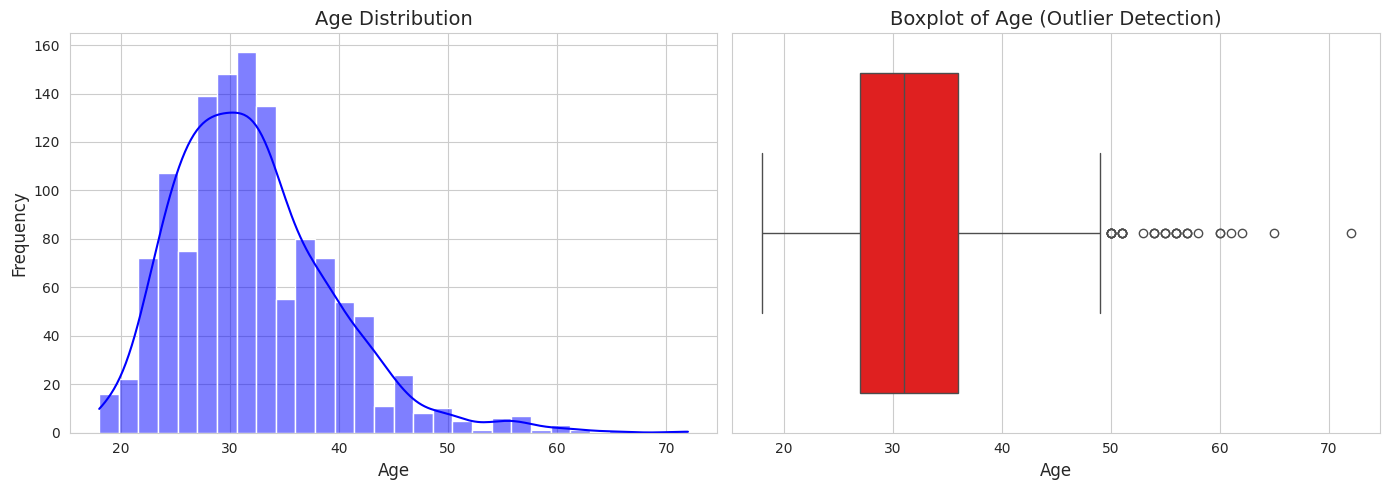

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore warnings for cleaner output
warnings.filterwarnings('ignore')

# Set Seaborn style
sns.set_style("whitegrid")

# Separate categorical and numerical columns
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = ["Age"]

# Create subplots for categorical variables
num_cats = len(categorical_columns)
rows = (num_cats // 3) + 1  # 3 columns per row
fig, axes = plt.subplots(nrows=rows, ncols=3, figsize=(20, rows * 5))
axes = axes.flatten()

# Plot bar graphs for categorical variables
for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, data=df, palette="Set1", ax=axes[i])
    axes[i].set_title(f"Distribution of {col}", fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Count", fontsize=12)

    # Annotate bars with count values
    for p in axes[i].patches:
        axes[i].annotate(f"{p.get_height()}",
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha="center", va="center", fontsize=10, color="black",
                         xytext=(0, 5), textcoords="offset points")

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

# Create a figure with two subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram for Age
sns.histplot(df["Age"], bins=30, kde=True, color="blue", ax=axes[0])
axes[0].set_title("Age Distribution", fontsize=14)
axes[0].set_xlabel("Age", fontsize=12)
axes[0].set_ylabel("Frequency", fontsize=12)

# Boxplot for Age
sns.boxplot(x=df["Age"], color="red", ax=axes[1])
axes[1].set_title("Boxplot of Age (Outlier Detection)", fontsize=14)
axes[1].set_xlabel("Age", fontsize=12)

# Show plots
plt.tight_layout()
plt.show()


**Observations:**
* 'self_emloyed' column has two unique values- 'Yes' and 'No', in which the no. of counts of 'No' is higher.
* 'family_history' column has two unique values- 'Yes' and 'No', with 'No' having higher no. of counts.
* 'treatment' column has two unique values- 'Yes' and 'No'. This column is our **target** column. The distribution for both the classes is nearly the same as the difference is minimal (637 and 622). So there is no concern of class imbalance.
* 'work_interfere' has 4 unique values- 'Often', 'Rarely', 'Never', 'Sometimes' with 'Sometimes' having the higher no. of counts.
* 'no_employees' has 6 unique range of values- '6-25', 'More than 1000', '26-100', '100-500', '1-5', '500-1000'.
* 'remote_work' has 2 unique values: 'Yes' and 'No', with 'No' having higher no. of count.
* 'tech_company' has 2 unique values- 'Yes' or 'No'.
* 'benefits' has 3 unique values- 'Yes', 'Don't know', 'No'.
*  'care_options have 3 unique values- 'Yes', 'No', 'Not sure'.
* 'wellness_program', 'seek_help', 'anonymity', 'mental_vs_physical' columns have 3 unique values- 'Yes', 'No', 'Don't know'.
* 'leave' column has 5 unqiue values- 'Somewhat easy' , 'Don't know', 'Somewhat difficult', 'Very difficult', 'Very easy'.
* 'mental_health_consequence' , 'phys_health_consequence', 'mental_health_interview', 'phys_health_interview' columns have 3 unique values- 'Yes' , 'No', 'Maybe'.
* ' coworkers', 'supervisor' columns have 3 unique values- 'Yes', 'No', 'Some of them'.
* 'obs_consequence' has 2 unique values- 'Yes' or 'No'.
* The distribution of 'Age' column is slightly skewed towards the right and contains some outliers as evident from the boxplot.


**Multivariate Analysis:**

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import itertools

# Set visualization style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)


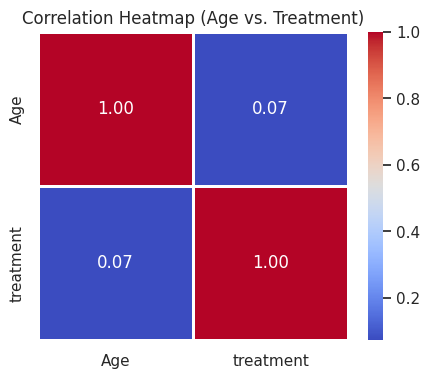

In [17]:
# Correlation Heatmap (For Age)
# Create a temporary copy of the DataFrame with 'treatment' converted to numerical
temp_df = df.copy()  # Create a copy to avoid modifying the original DataFrame
temp_df['treatment'] = temp_df['treatment'].map({'Yes': 1, 'No': 0})

# Correlation Heatmap (For Age) using the temporary DataFrame
plt.figure(figsize=(5, 4))
sns.heatmap(temp_df[['Age', 'treatment']].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=2)
plt.title("Correlation Heatmap (Age vs. Treatment)")
plt.show()

**Observations:** The correlation is very weak, meaning age does not strongly influence treatment. Furthermore, since the value is close to zero , we can conclude that age is not a key predictor of seeking treatment.

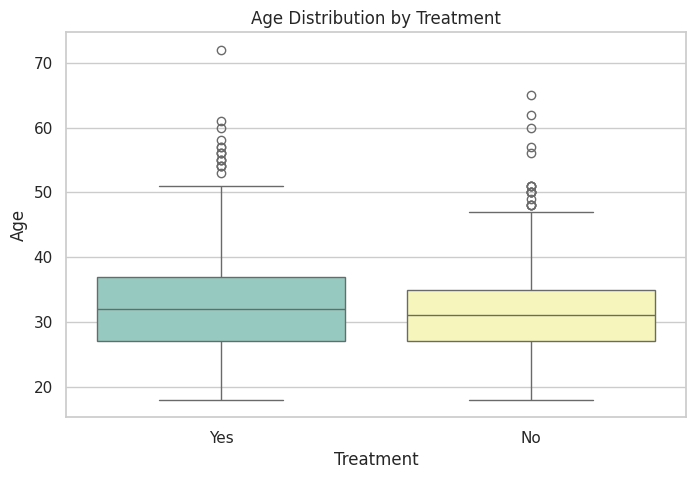

In [18]:
# Box Plot (Age vs. Treatment)
plt.figure(figsize=(8, 5))
sns.boxplot(x='treatment', y='Age', data=df, palette="Set3")
plt.title("Age Distribution by Treatment")
plt.xlabel("Treatment")
plt.ylabel("Age")
plt.show()

**Observations:**
* The median age of individuals who seek treatment is slightly higher than that of individuals who do not seek treatment.
* The IQR is roughly between 25 to 40 years for both groups. This suggests that most of the individuals all within this age range.
* The overall spread is similar for both groups indicating the age distributions are fairly comparable.
* Outliers are present in both categories, particularly in the older group (  nearly 50 or 50+ years)

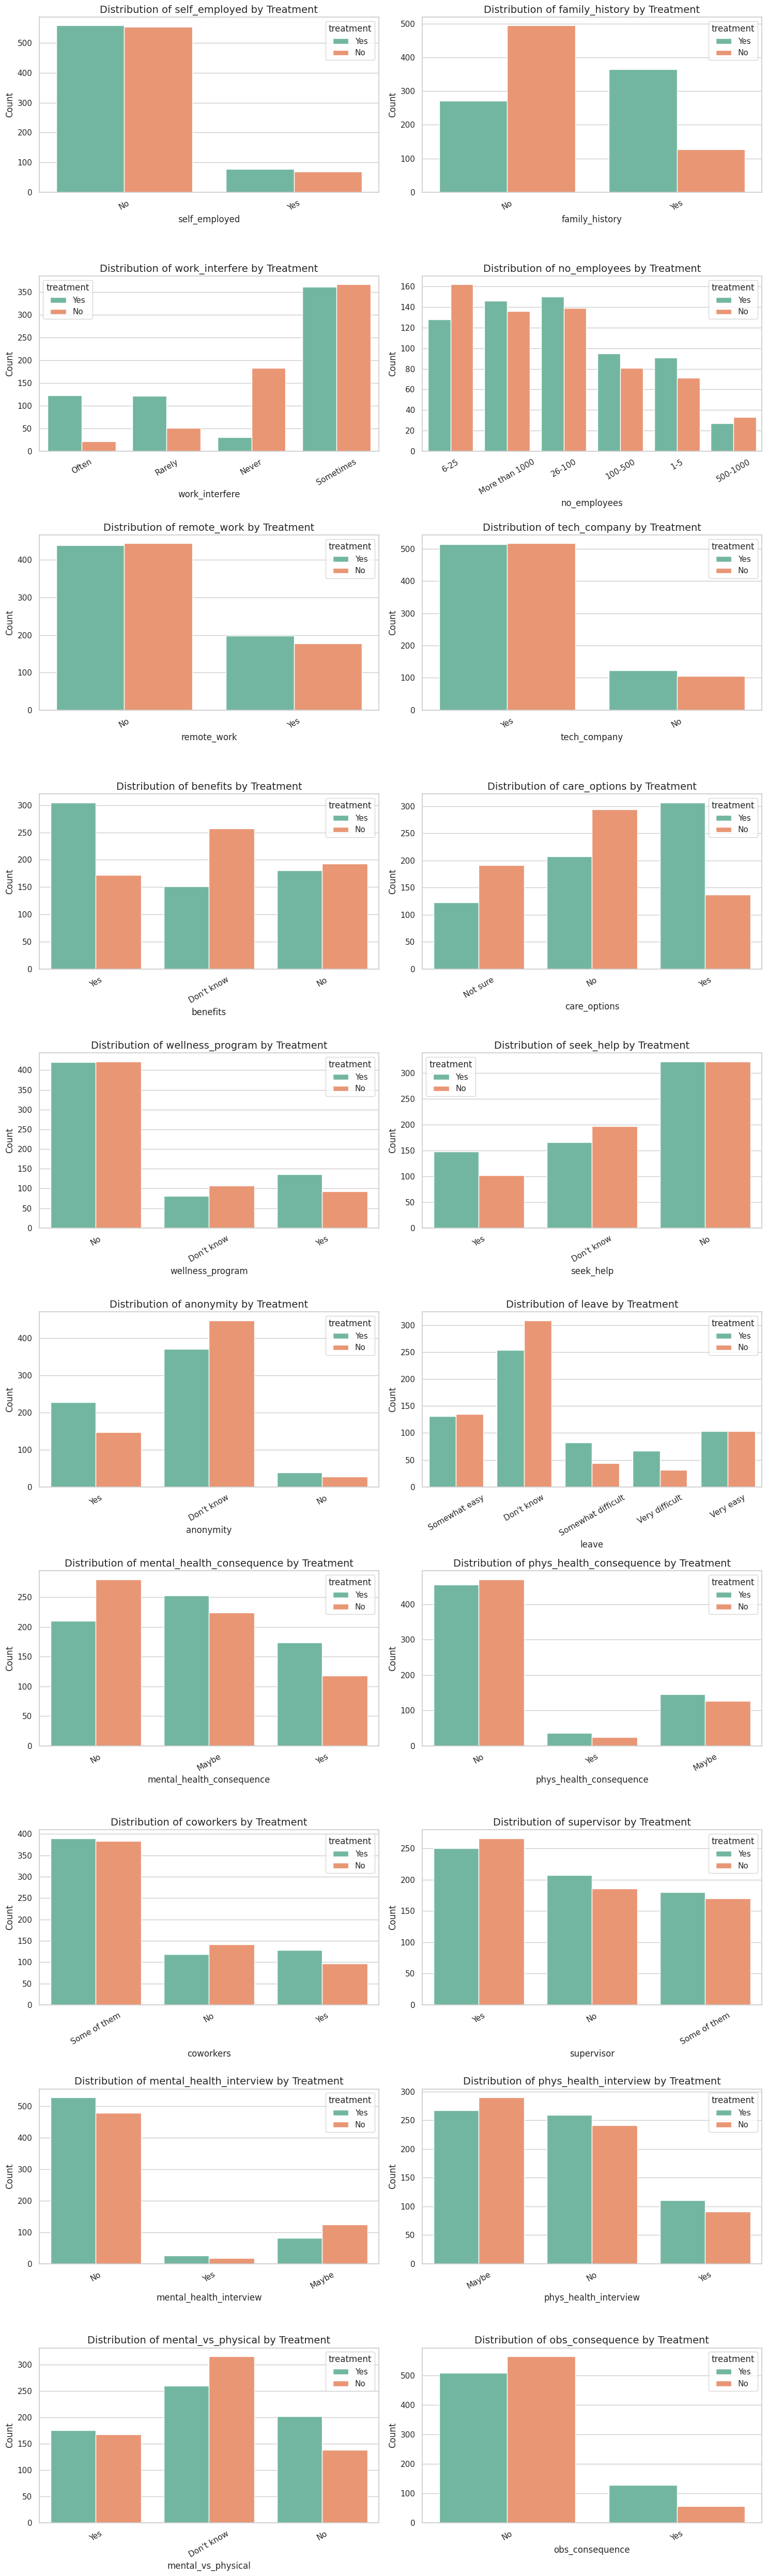

In [19]:
# Grouped Bar Plots (Categorical Variables vs. Treatment)

categorical_columns = categorical_columns[categorical_columns != 'treatment']

# Calculate the number of rows and columns needed for subplots
num_cols = len(categorical_columns)
num_rows = (num_cols + 1) // 2  # Calculate rows, ensuring at least 1

# Create subplots with enough space for all categorical columns
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, num_rows * 5))
# Flatten axes for easier iteration
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, hue="treatment", data=df, ax=axes[i], palette="Set2")
    axes[i].set_title(f"Distribution of {col} by Treatment", fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Count", fontsize=12)
    axes[i].tick_params(axis="x", rotation=30)

# Remove any extra empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])


plt.tight_layout()
plt.show()

**Observations and Inference:**
* **Family History vs Treatment:** It is observed that people with a family history of mental health issues are more likely to seek treatment. Furthermore, the count of individuals without a family history who do not seek treatment is significantly higher. Hence, family history plays a significant role in seeking treatment.
* **Work Interference vs Treatment:**'Sometimes' category dominates in both cases, meaning most employees do expereience mental health interference at work. Also, individuals who repot 'Often' and 'Sometimes' interfering with work are more likely to seek treatment. Hence, work interference may be a strong predictor of seeking treatment.
* **No. of employees vs Treatment:**No strong correlation is seen between company size and treatment-seeking behaviour. However, individuals in smaller companies ( 1-5 employees) have slightly fewer people seeking treatment compared to mid-sized companies ( 26-100).
* **Remote Work vs Treatment:** The number of people working remotely is significantly lower than those working on-site. The proportion of people seeking treatment remains similar across both categories.
* **Tech Company vs Treatment:** The majority of respondents work in a tech company. There is no significant difference in treatment-seeking behavior between those in tech and non-tech companies.
* **Benefits vs Treatment:** Employees who have mental health benefits at work are more likely to seek treatment. A significant number of people who "Don't Know" if they have benefits still seek treatment. Those who don't have benefits are less likely to seek treatment. Hence, having mental health at work increases the likelihood of seeking treatment.
* **Care_Options vs Treatment:** People who have access to care options (Yes) are more likely to seek treatment compared to those who do not. A significant proportion of people who are "Not Sure" about care options still seek treatment, though at a slightly lower rate. Those who do not have care options (No) are less likely to seek treatment. Hence,awareness of care options plays a role in treatment-seeking behavior.
* **Wellness Programns vs Treatment:** A large proportion of respondents do not have access to wellness programs.
* **Seek help vs Treatment:** People who are aware of seeking help at work ("Yes") have a higher proportion of treatment-seekers. Hence, the availability of workplace support systems plays a crucial role in mental health treatment-seeking behavior.
* **Anonymity vs Treatment:** Employees who have anonymity when discussing mental health at work tend to seek treatment more frequently.
* **Leave Policy vs Treatment:** Those who find it "Somewhat Easy" to take leave are more likely to seek treatment than those who find it "Very Difficult" to take leave are less likely to seek treatment. This suggests that strict leave policies may discourage seeking treatment.
* **Mental Health Consequences vs Treatment:** People who believe mental health issues have workplace consequences ("Yes") are less likely to seek treatment. Those who think there are no consequences tend to seek treatment more freely.
* **Physical Health Consequences vs Treatment:** Interestingly, those who believe physical health issues have workplace consequences tend to be less likely to seek mental health treatment.
* **Mental vs Physical Perception vs Treatment:** People who see mental and physical health as equally important tend to seek treatment more frequently. Those who "Don't Know" or believe they are not equal are less likely to seek treatment.
* **Coworker Support vs Treatment:** Employees who have support from "Some of them" (coworkers) are more likely to seek treatment compared to those who have no coworker support. A lack of coworker support might be a barrier to seeking treatment.
* **Supervisor Support vs Treatment:** Employees who have support from their supervisor are more likely to seek treatment than those with no or only parital support.
* **Observed Consequences of Mental Health Disclosure vs Treatment:** Employees who have observed negative consequences ("Yes") are significantly less likely to seek treatment. Those who haven’t observed any negative consequences ("No") are more likely to seek treatment.

**Data Pre-Processing and Feature Engineering:**

**Handle Outliers and Skewness:**

Since 'Age' column has outliers and is slightly skewed towards the right, we will use Winsorization to treat outliers and Box Cox transformation to treat skewness.

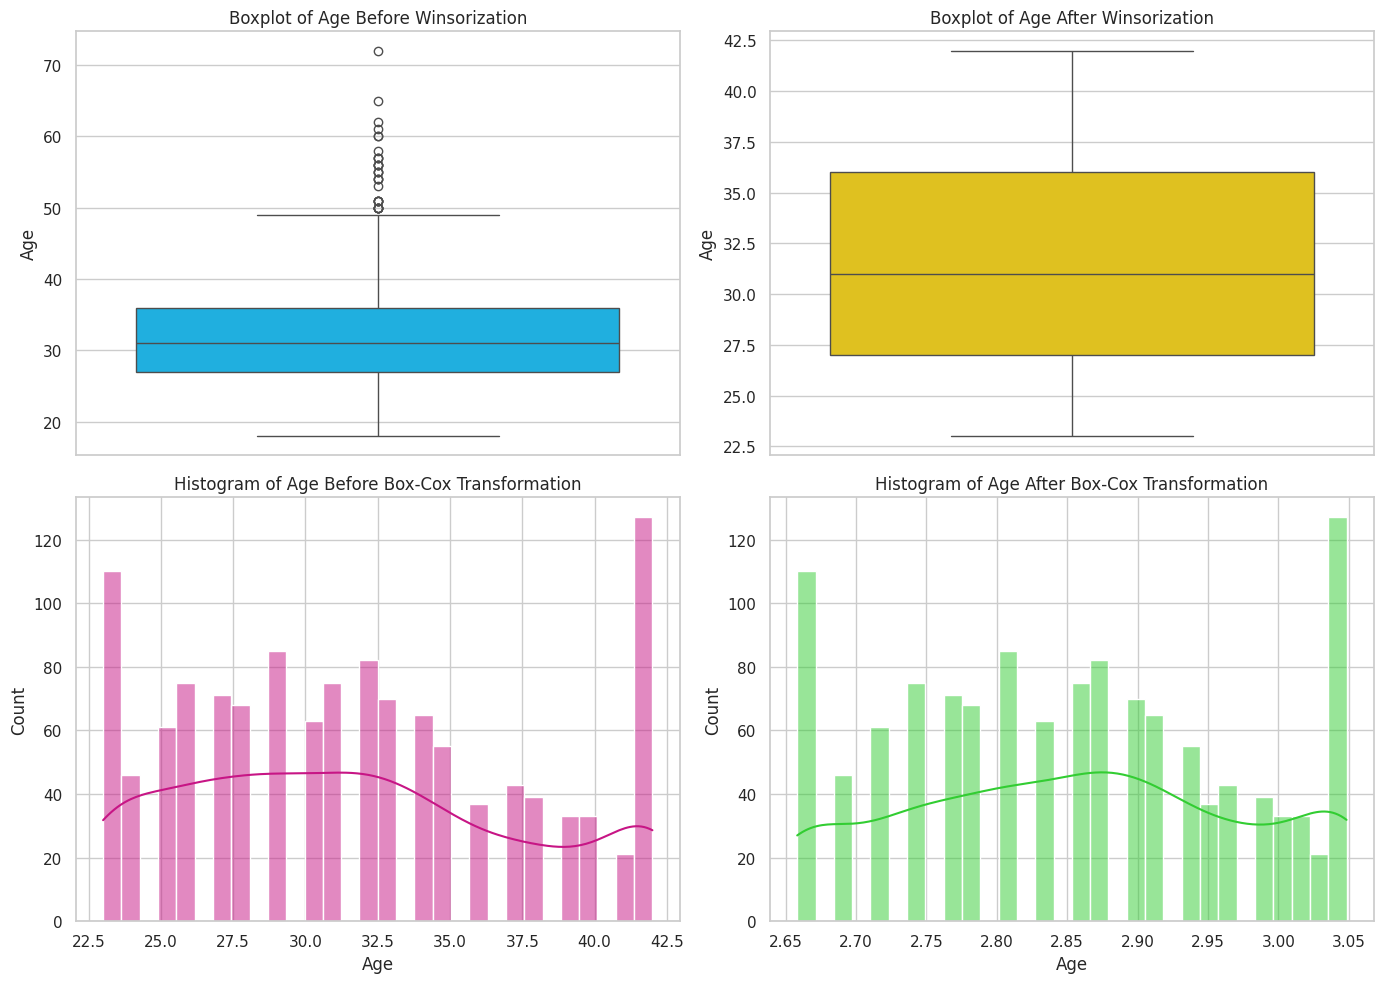

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
from scipy.stats import boxcox

# Set a bright style
sns.set_style("whitegrid")

# Create a 2x2 subplot layout
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Boxplot before Winsorization
sns.boxplot(y=df['Age'], ax=axes[0, 0], color='deepskyblue', orient='v')
axes[0, 0].set_title('Boxplot of Age Before Winsorization')

# Apply Winsorization (removing extreme outliers)
df['Age'] = winsorize(df['Age'], limits=[0.05, 0.1], inclusive=(True, True))

# Boxplot after Winsorization
sns.boxplot(y=df['Age'], ax=axes[0, 1], color='gold', orient='v')
axes[0, 1].set_title('Boxplot of Age After Winsorization')

# Histogram before Box-Cox transformation
sns.histplot(df['Age'], bins=30, kde=True, ax=axes[1, 0], color='mediumvioletred')
axes[1, 0].set_title('Histogram of Age Before Box-Cox Transformation')

# Apply Box-Cox transformation
df['Age'], lambda_age = boxcox(df['Age'] + 1)  # Adding 1 to handle zero values

# Histogram after Box-Cox transformation
sns.histplot(df['Age'], bins=30, kde=True, ax=axes[1, 1], color='limegreen')
axes[1, 1].set_title('Histogram of Age After Box-Cox Transformation')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


**Encoding Categorical Columns:**

We will use Label Encoding for binary columns and Ordinal Encoding for other categorical columns.

In [21]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

# Label Encoding for Binary Categorical Features
binary_cols = ['self_employed', 'family_history', 'treatment', 'remote_work', 'tech_company', 'obs_consequence']
for col in binary_cols:
    df[col] = df[col].map({'No': 0, 'Yes': 1})

# Ordinal Encoding for Ordered Categories
ordinal_mappings = {
    'work_interfere': ['Never', 'Rarely', 'Sometimes', 'Often'],
    'no_employees': ['1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000'],
    'benefits': ['No', "Don't know", 'Yes'],
    'care_options': ['No', 'Not sure', 'Yes'],
    'wellness_program': ['No', "Don't know", 'Yes'],
    'seek_help': ['No', "Don't know", 'Yes'],
    'anonymity': ['No', "Don't know", 'Yes'],
    'mental_vs_physical': ['No', "Don't know", 'Yes'],
    'leave': ['Very difficult', 'Somewhat difficult', "Don't know", 'Somewhat easy', 'Very easy'],
    'mental_health_consequence': ['No', 'Maybe', 'Yes'],
    'phys_health_consequence': ['No', 'Maybe', 'Yes'],
    'mental_health_interview': ['No', 'Maybe', 'Yes'],
    'phys_health_interview': ['No', 'Maybe', 'Yes'],
    'coworkers': ['No', 'Some of them', 'Yes'],
    'supervisor': ['No', 'Some of them', 'Yes']
}

ordinal_encoder = OrdinalEncoder(categories=[ordinal_mappings[col] for col in ordinal_mappings])
df[list(ordinal_mappings.keys())] = ordinal_encoder.fit_transform(df[list(ordinal_mappings.keys())])

# Convert to integer type
df = df.astype(int)


In [22]:
# Verify the changes
df.head()

,Age,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,2,0,0,1,3,1,0,1,2,1,...,2,3,0,0,1,2,0,1,2,0
1,3,0,0,0,1,5,0,0,1,0,...,1,2,1,0,0,0,0,0,1,0
2,2,0,0,0,1,1,0,1,0,0,...,1,1,0,0,2,2,2,2,0,0
3,2,0,1,1,3,2,0,1,0,2,...,0,1,2,2,1,0,1,1,0,1
4,2,0,0,0,0,3,1,1,2,0,...,1,2,0,0,1,2,2,2,1,0


In [23]:
import joblib
# Save the ordinal encoder
joblib.dump(ordinal_encoder, "ordinal_encoder.pkl")

['ordinal_encoder.pkl']

**Define Features and Target variables:**

In [24]:
# Separate the features and the target
X = df.drop('treatment', axis=1)  # Features
y = df['treatment']  # Target

**Split the data into train and test sets:**

In [25]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [26]:
# Print the shape of train and test data
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1007, 21)
Shape of X_test: (252, 21)
Shape of y_train: (1007,)
Shape of y_test: (252,)


**Feature Scaling:**

In [27]:
# Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
# save the scaler
import joblib
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

**Determine Feature Importance using Random Forest:**

                      Feature  Importance
2              family_history    0.122142
3              work_interfere    0.121539
4                no_employees    0.075203
8                care_options    0.072736
12                      leave    0.071606
7                    benefits    0.051687
15                  coworkers    0.047141
13  mental_health_consequence    0.046959
18      phys_health_interview    0.045972
19         mental_vs_physical    0.042364
16                 supervisor    0.041621
10                  seek_help    0.037231
9            wellness_program    0.032655
11                  anonymity    0.031095
5                 remote_work    0.028094
14    phys_health_consequence    0.026693
0                         Age    0.023687
17    mental_health_interview    0.023638
20            obs_consequence    0.022457
6                tech_company    0.020843
1               self_employed    0.014636


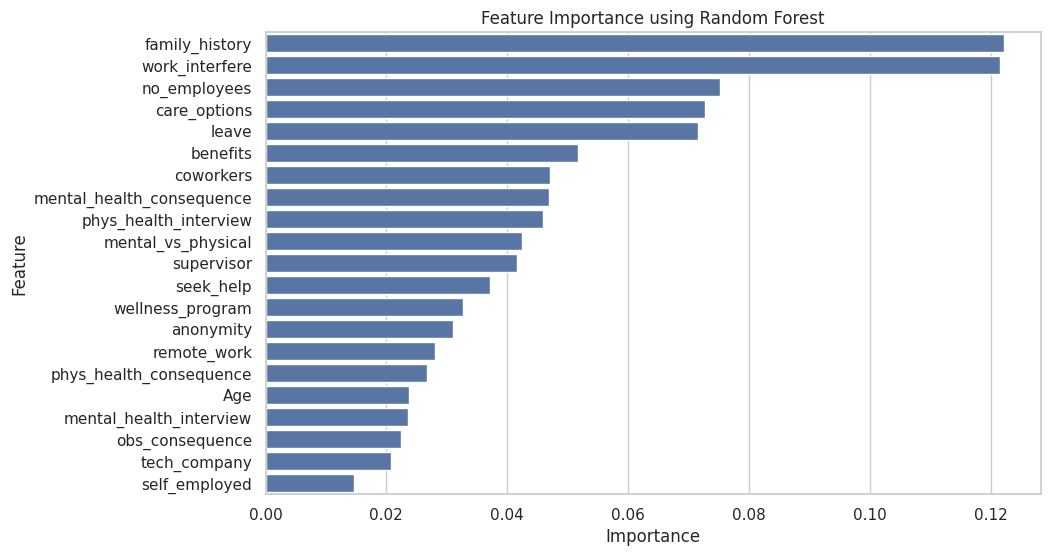

In [29]:
# Random Forest for feature importance on the resampled data
from sklearn.ensemble import RandomForestClassifier

# Fit the random forest on the resampled data
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

# Get feature importances
importances = rf.feature_importances_
features = X_train.columns

# Create a DataFrame to store the feature importance
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances with more decimal places
pd.set_option('display.float_format', '{:.6f}'.format)
print(feature_importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance using Random Forest')
plt.show()

Hence, based on the above feature importance values and objective of the task, we will select the **top 13** features for training the model:  "family_history", "work_interfere", "no_employees", "care_options", "leave", "benefits", "coworkers", "mental_health_consequence", "phys_health_interview","mental_vs_physical", "supervisor", "seek_help", "wellness_program"

**Perform Feature Selection:**

In [30]:
import numpy as np

# List of top 13 selected features
selected_features = [
    "family_history", "work_interfere", "no_employees", "care_options", "leave",
    "benefits", "coworkers", "mental_health_consequence", "phys_health_interview",
    "mental_vs_physical", "supervisor", "seek_help", "wellness_program"
]

# Get the column indices of selected features
selected_indices = [X_train.columns.get_loc(feature) for feature in selected_features]

# Update X_train_scaled and X_test_scaled by selecting only the required columns
X_train_scaled = X_train_scaled[:, selected_indices]
X_test_scaled = X_test_scaled[:, selected_indices]


**Model Selection:** We will be training the following 4 Machine Learning models: Support Vector Machine, Random Forest, Xgboost and Neural Network.

**Hyperparameter Tuning using GridSearchCV:**

In [31]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
import keras_tuner as kt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import pandas as pd

In [32]:
# Hyperparameter tuning for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='f1')
grid_rf.fit(X_train_scaled, y_train)
best_rf_params = grid_rf.best_params_


# Hyperparameter tuning for XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.5, 0.75, 1.0],
    'colsample_bytree': [0.5, 0.75, 1.0]
}

grid_xgb = GridSearchCV(XGBClassifier(random_state=42, eval_metric='auc'),
                         param_grid_xgb, cv=5, scoring='f1')
grid_xgb.fit(X_train_scaled, y_train)
best_xgb_params = grid_xgb.best_params_


# Support Vector Machine model
grid_svm = GridSearchCV(SVC(random_state=42, probability=True),
                        {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
                        cv=5, scoring='f1')
grid_svm.fit(X_train_scaled, y_train)
best_svm_params = grid_svm.best_params_


# Function to build the neural network model
def build_nn_model(hp):
    model = Sequential()
    model.add(Dense(hp.Int('units', min_value=16, max_value=128, step=16), activation='relu',
                    input_shape=(X_train_scaled.shape[1],)))
    model.add(Dropout(hp.Float('dropout', 0.1, 0.5, step=0.1)))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [0.01, 0.001, 0.0001])),
                  loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Initialize Keras Tuner
tuner = kt.Hyperband(build_nn_model,
                     objective='val_accuracy',
                     max_epochs=50,
                     factor=3,
                     directory='keras_tuner',
                     project_name='mental_health_nn')

# Perform hyperparameter search
tuner.search(X_train_scaled, y_train, epochs=50, validation_split=0.2,
             callbacks=[EarlyStopping(monitor='val_loss', patience=5)])

# Retrieve the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build and train the model again with the best hyperparameters
best_model = tuner.hypermodel.build(best_hps)

history = best_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2,
                         callbacks=[EarlyStopping(monitor='val_loss', patience=5)], verbose=1)

# Find the optimal epoch (highest validation accuracy)
best_epoch = history.history['val_accuracy'].index(max(history.history['val_accuracy'])) + 1


print("Best parameters for Random Forest:", best_rf_params)
print("Best parameters for XGBoost:", best_xgb_params)
print("Best parameters for SVM:", best_svm_params)
print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}. Also the best dropout rate is {best_hps.get('dropout')}.
The optimal number of epochs is {best_epoch}.
""")


Trial 90 Complete [00h 00m 14s]
val_accuracy: 0.7128713130950928

Best val_accuracy So Far: 0.7475247383117676
Total elapsed time: 00h 08m 27s
Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.4210 - loss: 1.1094 - val_accuracy: 0.4109 - val_loss: 0.8439
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4629 - loss: 0.9555 - val_accuracy: 0.4208 - val_loss: 0.7984
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4624 - loss: 0.9051 - val_accuracy: 0.4505 - val_loss: 0.7644
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4534 - loss: 0.8506 - val_accuracy: 0.4802 - val_loss: 0.7361
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4923 - loss: 0.8103 - val_accuracy: 0.5149 - val_loss: 0.7138
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4905 - loss: 0.7651 - val_accuracy: 0.5297 - val_loss: 0.6958
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5688 - loss: 0.7165 - val_accuracy: 

In [34]:
# Define models with best parameters
models = {
    'Support Vector Machine': SVC(random_state=42, probability=True, **best_svm_params),
    'Random Forest': RandomForestClassifier(random_state=42, **best_rf_params),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='logloss', **best_xgb_params),
    'Neural Network': best_model
}

**Model Training and Evaluation:**

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7124 - loss: 0.5563
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


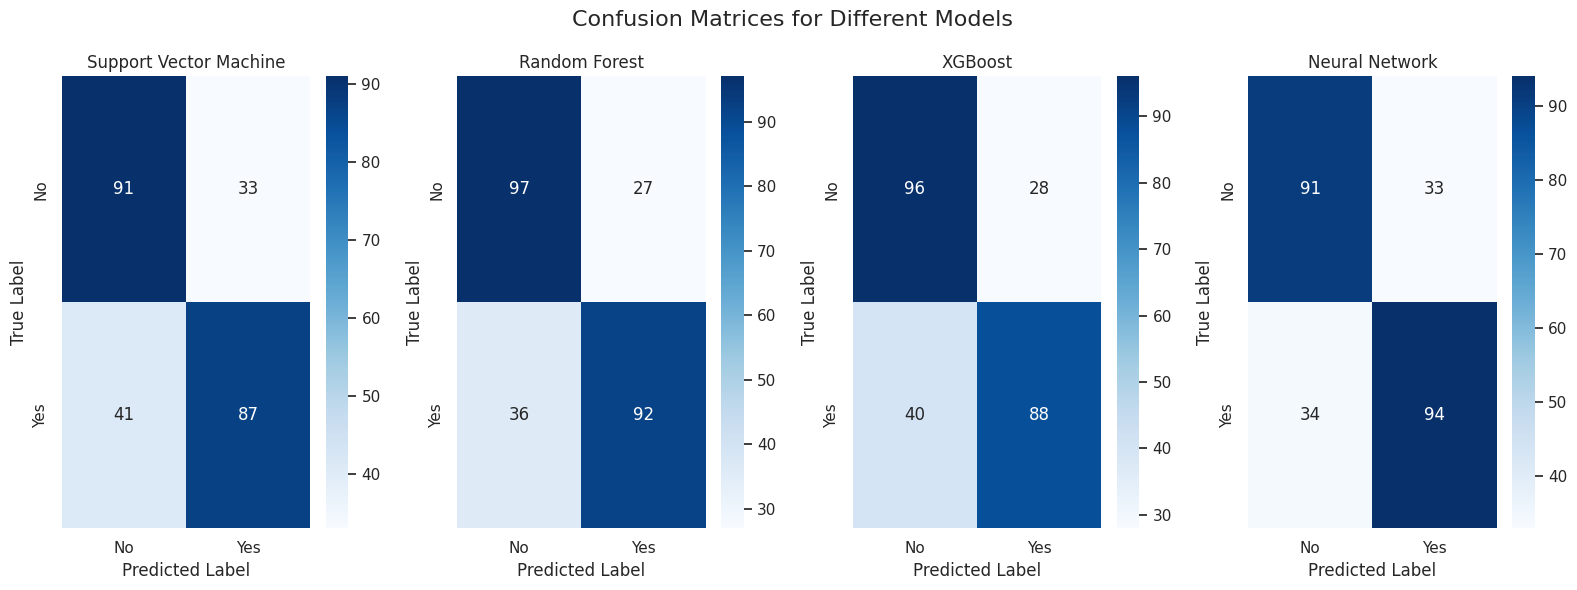

                        Accuracy  Precision   Recall  F1 Score  ROC-AUC
Support Vector Machine  0.706349   0.725000 0.679688  0.701613 0.756993
Random Forest           0.750000   0.773109 0.718750  0.744939 0.808531
XGBoost                 0.730159   0.758621 0.687500  0.721311 0.801222
Neural Network          0.734127   0.740157 0.734375  0.737255 0.778793


In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping

# Function to plot confusion matrices
def plot_confusion_matrices(models, X_test, y_test):
    fig, axes = plt.subplots(nrows=1, ncols=len(models), figsize=(16, 6))
    fig.suptitle('Confusion Matrices for Different Models', fontsize=16)

    for ax, (model_name, model) in zip(axes, models.items()):
        y_pred = model.predict(X_test)
        if model_name == 'Neural Network':
            y_pred = (y_pred > 0.5).astype(int)  # Ensure binary classification
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'], ax=ax)
        ax.set_title(f'{model_name}')
        ax.set_xlabel('Predicted Label')
        ax.set_ylabel('True Label')

    plt.tight_layout()
    plt.show()

# Train models and store metrics
metrics = {}

for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)

    if model_name == 'Neural Network':
        y_pred = (model.predict(X_test_scaled) > 0.5).astype(int)  # Convert probabilities to binary 0/1
        y_pred_proba = model.predict(X_test_scaled)  # Get probabilities
    else:
        y_pred = model.predict(X_test_scaled)
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

    metrics[model_name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_pred_proba)
    }

# Convert metrics to DataFrame
metrics_df = pd.DataFrame(metrics).T

# Plot confusion matrices
plot_confusion_matrices(models, X_test_scaled, y_test)

# Display model metrics
print(metrics_df)


**Observation and Inferences:**
* In terms of Accuracy, Random Forest outperforms all models in overall correctness while SVM has the lowest accuracy.
* Random Forest has the highest precision and recall meaning, it makes fewer false positive predictions and has the least false negatives.
* In terms of F1 score, Radom forest is the most balanced.
* The ROC-AUC is also the best for Random Forest.

**Perform Cross Validation:**

In [36]:
from sklearn.model_selection import KFold, cross_val_score
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import f1_score

# Define cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_metrics = {}

# Use the best number of epochs from hyperparameter tuning
BEST_EPOCHS = 42

for model_name, model in models.items():
    if model_name == 'Neural Network':
        nn_f1_scores = []

        for train_idx, val_idx in cv.split(X_train_scaled, y_train):
            # Split data
            X_train_fold, X_val_fold = X_train_scaled[train_idx], X_train_scaled[val_idx]
            y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

            # Define the neural network model
            def build_nn():
                model = keras.Sequential([
                    keras.layers.Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
                    keras.layers.Dense(16, activation='relu'),
                    keras.layers.Dense(1, activation='sigmoid')  # Binary classification
                ])
                model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
                return model

            nn_model = build_nn()

            # Train model with best epochs
            nn_model.fit(X_train_fold, y_train_fold, epochs=BEST_EPOCHS, batch_size=32, verbose=0)

            # Predict on validation set
            y_val_pred = (nn_model.predict(X_val_fold) > 0.5).astype(int)

            # Calculate F1-score
            f1 = f1_score(y_val_fold, y_val_pred)
            nn_f1_scores.append(f1)

        # Store metrics
        cv_metrics[model_name] = {
            'F1 Score CV': np.mean(nn_f1_scores),
            'F1 Score Std': np.std(nn_f1_scores)
        }

    else:
        cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='f1')
        cv_metrics[model_name] = {'F1 Score CV': np.mean(cv_scores), 'F1 Score Std': np.std(cv_scores)}

# Convert results to DataFrame and print
cv_metrics_df = pd.DataFrame(cv_metrics).T
print("\nCross-Validation Results for All Models:\n")
print(cv_metrics_df)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

Cross-Validation Results for All Models:

                        F1 Score CV  F1 Score Std
Support Vector Machine     0.738432      0.029814
Random Forest              0.762637      0.020580
XGBoost                    0.770760      0.023718
Neural Network             0.710028      0.050284


**Observations:**
Hence, it is observed that Random Forest, has :
* Highest Accuracy (0.7500)
* High F1 Score (0.7449)
* Best ROC-AUC (0.8085)
* Lowest Variance in F1 Score across folds (0.0206), ensuring stability.

Therefore we select the Random Forest Model as our final model.

**Model Interpretation using SHAP:**

Variable Importance Plot - Global Interpretation


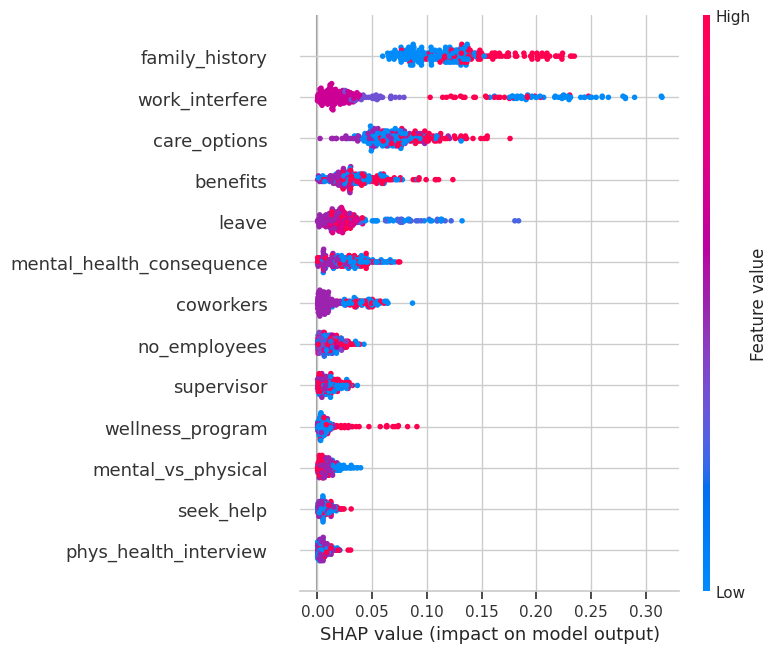

In [37]:
import shap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Initialize JS visualization
shap.initjs()

# Access the Random Forest model
random_forest_model = models['Random Forest']

# Create the SHAP explainer
explainer = shap.TreeExplainer(random_forest_model)

# Compute SHAP values
shap_values = explainer.shap_values(X_test_scaled)

# Fix for binary classification (if shap_values is a list)
if isinstance(shap_values, list):
    shap_values = shap_values[1]  # Use SHAP values for the positive class

# Fix for multi-class classification (average across classes)
if shap_values.ndim == 3:
    shap_values = np.mean(np.abs(shap_values), axis=2)  # Take mean across all classes

# Use selected feature names
feature_names = [
    "family_history", "work_interfere", "no_employees", "care_options", "leave",
    "benefits", "coworkers", "mental_health_consequence", "phys_health_interview",
    "mental_vs_physical", "supervisor", "seek_help", "wellness_program"
]

# Convert to DataFrame
shap_df = pd.DataFrame(shap_values, columns=feature_names)

# Plot the summary with feature names
print("Variable Importance Plot - Global Interpretation")
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test_scaled, feature_names=feature_names)


**Observations:**
* 'family_history' , 'work_interfere', 'care_options', and 'benefits' have the highest SHAP values, meaning they contribute the most to the model's predictions. These features have the largest spread in SHAP values, indicating they strongly influence whether the model predicts a positive or negative outcome.
* 'phys_health_interview', 'seek_help', 'mental_vs_physical', and 'wellness_program' have much lower SHAP values, meaning they contribute less to the model's predictions. These features have a smaller spread, suggesting they do not strongly differentiate the outcomes.
* Hence, family history of mental heatlh issues and workplace-related factors are curcial in predicting in target variable.
* Features like 'leave', 'supervisor', and 'coworkers' influence predictions, indicating that workplace policies and environment play a role in the outcome.
* 'phys_health_interview' and 'seek_help' seem to have minimal influence, suggesting they may not be strong predictors in this dataset.

**Model Interpretation using LIME:**

In [38]:
import lime
import lime.lime_tabular
import numpy as np


In [39]:
# Initialize LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_scaled,
    feature_names=[
    "family_history", "work_interfere", "no_employees", "care_options", "leave",
    "benefits", "coworkers", "mental_health_consequence", "phys_health_interview",
    "mental_vs_physical", "supervisor", "seek_help", "wellness_program"
],
    class_names=['No Treatment', 'Treatment'],
    mode='classification'
)


In [40]:
i = 0  # Change this to pick different samples
instance = X_test_scaled[i]


In [41]:
def rf_predict_fn(x):
    return models['Random Forest'].predict_proba(x)

# Explain prediction
explanation = explainer.explain_instance(instance, rf_predict_fn)

explanation.show_in_notebook()



**Observations:**
* For a single prediction, the model predicts 'No Treatment' with 57% confidence and 'Treatment' with 43% confidence.
* The blue bars push the prediction towards 'No Treatment' and the orange bars push the prediction towards 'Treatment'.
* For example: we see that leave (orange) increases the likelihood of Treatment and family_history increases the likelihood of 'No Treatment'.
* The table shows the acutal feature values for this prediction.

**Save the Random Forest Model:**

In [42]:
import joblib
# Save the trained model
joblib.dump(models['Random Forest'], "random_forest_model.pkl")



['random_forest_model.pkl']

**Inference Script with LLM Intergration for explanation:**

In [56]:
%%writefile predict_mental_health.py
import pickle
import numpy as np
import pandas as pd
import joblib
from sklearn.preprocessing import LabelEncoder
import os
import google.generativeai as genai
from IPython.display import Markdown
import warnings
warnings.filterwarnings('ignore')

# Set your API key
os.environ['GOOGLE_API_KEY'] = "YOUR_GOOGLE_API_KEY"

# Configure the API with the key
genai.configure(api_key=os.environ['GOOGLE_API_KEY'])

# Initialize the Gemini model (gemini-pro)
model = genai.GenerativeModel('gemini-1.5-pro')   # We will use the gemini-1.5-pro model as our LLM


# Load the saved model and preprocessing tools
rf_model = joblib.load("random_forest_model.pkl")  # Load trained model
scaler = joblib.load("scaler.pkl")  # Load saved standard scaler
ordinal_encoder = joblib.load("ordinal_encoder.pkl")  # Load saved ordinal encoder

# Define all features used in model training
all_features = [
    "Age", "self_employed", "family_history", "work_interfere", "no_employees",
    "remote_work", "tech_company", "benefits", "care_options", "wellness_program",
    "seek_help", "anonymity", "leave", "mental_health_consequence", "phys_health_consequence",
    "coworkers", "supervisor", "mental_health_interview", "phys_health_interview",
    "mental_vs_physical", "obs_consequence"
]


# Define selected features used for final prediction
selected_features = [
    "family_history", "work_interfere", "no_employees", "care_options", "leave",
    "benefits", "coworkers", "mental_health_consequence", "phys_health_interview",
    "mental_vs_physical", "supervisor", "seek_help", "wellness_program"
]

# Define binary and ordinal mappings
binary_mappings = {'No': 0, 'Yes': 1}

ordinal_mappings = {
    'work_interfere': ['Never', 'Rarely', 'Sometimes', 'Often'],
    'no_employees': ['1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000'],
    'benefits': ['No', "Don't know", 'Yes'],
    'care_options': ['No', 'Not sure', 'Yes'],
    'wellness_program': ['No', "Don't know", 'Yes'],
    'seek_help': ['No', "Don't know", 'Yes'],
    'anonymity': ['No', "Don't know", 'Yes'],
    'mental_vs_physical': ['No', "Don't know", 'Yes'],
    'leave': ['Very difficult', 'Somewhat difficult', "Don't know", 'Somewhat easy', 'Very easy'],
    'mental_health_consequence': ['No', 'Maybe', 'Yes'],
    'phys_health_consequence': ['No', 'Maybe', 'Yes'],
    'mental_health_interview': ['No', 'Maybe', 'Yes'],
    'phys_health_interview': ['No', 'Maybe', 'Yes'],
    'coworkers': ['No', 'Some of them', 'Yes'],
    'supervisor': ['No', 'Some of them', 'Yes']
}

binary_columns = [
    "self_employed", "family_history", "remote_work", "tech_company", "obs_consequence"
]

# **Function to collect user input for all features**
def get_user_input():
    user_data = {}

    # Collect input for all features
    for feature in all_features:
        if feature in binary_columns:
            print(f"Choose one for {feature}: Yes/No")  # Show Yes/No choices for binary columns
        elif feature in ordinal_mappings:
            print(f"Choose one for {feature}: {', '.join(ordinal_mappings[feature])}")  # Show ordinal choices

        user_data[feature] = input(f"Enter value for {feature}: ").strip()

    return pd.DataFrame([user_data])

# Get user input
user_df = get_user_input()

# Convert binary categorical columns using the binary mapping
binary_cols = ['self_employed', 'family_history', 'remote_work', 'tech_company', 'obs_consequence']
for col in binary_cols:
    user_df[col] = user_df[col].map(binary_mappings)

# Apply Ordinal Encoding for the ordinal features
user_df[list(ordinal_mappings.keys())] = ordinal_encoder.transform(user_df[list(ordinal_mappings.keys())])

# Ensure Age is numeric
user_df["Age"] = pd.to_numeric(user_df["Age"], errors="coerce")

# Convert to integer type
user_df = user_df.astype(int)

# **Scale all features using the saved scaler**
user_df_scaled = scaler.transform(user_df)

# **Select only the relevant features for prediction**
selected_indices = [user_df.columns.get_loc(col) for col in selected_features]
user_df_scaled_selected = user_df_scaled[:, selected_indices]

# **Make prediction**
prediction = rf_model.predict(user_df_scaled_selected)
prediction_proba = rf_model.predict_proba(user_df_scaled_selected)[:, 1]

def reverse_map_features(input_df):
    reversed_dict = {}

    # Reverse binary encoding (1 -> Yes, 0 -> No)
    for col in binary_columns:
        reversed_dict[col] = input_df[col].map({1: "Yes", 0: "No"})

    # Reverse ordinal encoding
    for col, categories in ordinal_mappings.items():
        reversed_dict[col] = input_df[col].apply(lambda x: categories[int(x)] if pd.notnull(x) else x)

    return pd.DataFrame(reversed_dict)

mapped_input = reverse_map_features(user_df)

# **Filter mapped_input to include only selected features**
mapped_input_selected = mapped_input[selected_features]


# **Generate explanation using Gemini**
prompt = f"""
A person with the following mental health assessment features has been analyzed:

{mapped_input_selected.to_dict(orient='records')[0]}

Based on this assessment, the model predicts that this individual {'will seek treatment' if prediction[0] == 1 else 'will not seek treatment'}.

Provide:
1. A  detailed  and descriptive natural language explanation for the prediction.
2. Suggested coping mechanisms and potential next steps.
"""

response = genai.GenerativeModel('gemini-pro').generate_content(prompt)
llm_explanation = response.text

# Display results
print("\n🔹 **Mental Health Treatment Prediction** 🔹")
print(f"Prediction: {'Will Seek Treatment' if prediction[0] == 1 else 'Will Not Seek Treatment'}")
print(f"Confidence Score: {prediction_proba[0]:.2f}")
print("\n🧠 **Explanation from Gemini:**")
print(llm_explanation)


Overwriting predict_mental_health.py


In [51]:
!python predict_mental_health.py  # Run inference script


Enter value for Age: 23
Choose one for self_employed: Yes/No
Enter value for self_employed: Yes
Choose one for family_history: Yes/No
Enter value for family_history: Yes
Choose one for work_interfere: Never, Rarely, Sometimes, Often
Enter value for work_interfere: Sometimes
Choose one for no_employees: 1-5, 6-25, 26-100, 100-500, 500-1000, More than 1000
Enter value for no_employees: 26-100
Choose one for remote_work: Yes/No
Enter value for remote_work: Yes
Choose one for tech_company: Yes/No
Enter value for tech_company: Yes
Choose one for benefits: No, Don't know, Yes
Enter value for benefits: Yes
Choose one for care_options: No, Not sure, Yes
Enter value for care_options: Yes
Choose one for wellness_program: No, Don't know, Yes
Enter value for wellness_program: Yes
Choose one for seek_help: No, Don't know, Yes
Enter value for seek_help: Yes
Choose one for anonymity: No, Don't know, Yes
Enter value for anonymity: Yes
Choose one for leave: Very difficult, Somewhat difficult, Don't kno

**UI Developement using Streamlit:**

In [45]:
!pip install -q streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 89.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 121.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 8.0 MB/s eta 0:00:00


In [57]:
%%writefile mental_health_ui.py
import streamlit as st
import pickle
import numpy as np
import pandas as pd
import joblib
from sklearn.preprocessing import LabelEncoder
import os
import google.generativeai as genai
from IPython.display import Markdown
import warnings
warnings.filterwarnings('ignore')

def reset_form():
    for key in st.session_state.keys():
        del st.session_state[key]
    st.rerun()

# Set your API key
os.environ['GOOGLE_API_KEY'] = "YOUR_GOOGLE_API_KEY"

# Configure the API with the key
genai.configure(api_key=os.environ['GOOGLE_API_KEY'])

# Initialize the Gemini model (gemini-pro)
model = genai.GenerativeModel('gemini-1.5-pro')

# Load the saved model and preprocessing tools
rf_model = joblib.load("random_forest_model.pkl")  # Load trained model
scaler = joblib.load("scaler.pkl")  # Load saved standard scaler
ordinal_encoder = joblib.load("ordinal_encoder.pkl")  # Load saved ordinal encoder

# Define all features used in model training
all_features = [
    "Age", "self_employed", "family_history", "work_interfere", "no_employees",
    "remote_work", "tech_company", "benefits", "care_options", "wellness_program",
    "seek_help", "anonymity", "leave", "mental_health_consequence", "phys_health_consequence",
    "coworkers", "supervisor", "mental_health_interview", "phys_health_interview",
    "mental_vs_physical", "obs_consequence"
]


# Define selected features used for final prediction
selected_features = [
    "family_history", "work_interfere", "no_employees", "care_options", "leave",
    "benefits", "coworkers", "mental_health_consequence", "phys_health_interview",
    "mental_vs_physical", "supervisor", "seek_help", "wellness_program"
]

# Define binary and ordinal mappings
binary_mappings = {'No': 0, 'Yes': 1}

ordinal_mappings = {
    'work_interfere': ['Never', 'Rarely', 'Sometimes', 'Often'],
    'no_employees': ['1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000'],
    'benefits': ['No', "Don't know", 'Yes'],
    'care_options': ['No', 'Not sure', 'Yes'],
    'wellness_program': ['No', "Don't know", 'Yes'],
    'seek_help': ['No', "Don't know", 'Yes'],
    'anonymity': ['No', "Don't know", 'Yes'],
    'mental_vs_physical': ['No', "Don't know", 'Yes'],
    'leave': ['Very difficult', 'Somewhat difficult', "Don't know", 'Somewhat easy', 'Very easy'],
    'mental_health_consequence': ['No', 'Maybe', 'Yes'],
    'phys_health_consequence': ['No', 'Maybe', 'Yes'],
    'mental_health_interview': ['No', 'Maybe', 'Yes'],
    'phys_health_interview': ['No', 'Maybe', 'Yes'],
    'coworkers': ['No', 'Some of them', 'Yes'],
    'supervisor': ['No', 'Some of them', 'Yes']
}

binary_columns = [
    "self_employed", "family_history", "remote_work", "tech_company", "obs_consequence"
]


st.set_page_config(page_title='Mental Health Prediction', layout='wide')
st.title("Mental Health Self-Assessment 🧠")
st.subheader("Predict whether an individual is likely to seek mental health treatment based on responses.")



def get_user_input():
    user_data = {}
    for feature in all_features:
        if feature in binary_columns:
            user_data[feature] = st.radio(f"Choose one for {feature.replace('_', ' ').title()}:", ['No', 'Yes'])
        elif feature in ordinal_mappings:
            user_data[feature] = st.selectbox(f"Choose one for {feature.replace('_', ' ').title()}:", ordinal_mappings[feature])
        else:
            user_data[feature] = st.text_input(f"Enter value for {feature.replace('_', ' ').title()}: ")

    return user_data

# Add a reset button
st.sidebar.button("Start Over", on_click=reset_form)

# Get user input
user_data = get_user_input()

if st.button("Predict Mental Health Treatment"):

    if all(val is not None and val != '' for val in user_data.values()):
      user_df=pd.DataFrame([user_data])

      # Convert binary categorical columns using the binary mapping
      binary_cols = ['self_employed', 'family_history', 'remote_work', 'tech_company', 'obs_consequence']
      for col in binary_cols:
          user_df[col] = user_df[col].map(binary_mappings)

      # Apply Ordinal Encoding for the ordinal features
      user_df[list(ordinal_mappings.keys())] = ordinal_encoder.transform(user_df[list(ordinal_mappings.keys())])

      # Ensure Age is numeric
      user_df["Age"] = pd.to_numeric(user_df["Age"], errors="coerce")

      # Convert to integer type
      user_df = user_df.astype(int)

      # **Scale all features using the saved scaler**
      user_df_scaled = scaler.transform(user_df)

      # **Select only the relevant features for prediction**
      selected_indices = [user_df.columns.get_loc(col) for col in selected_features]
      user_df_scaled_selected = user_df_scaled[:, selected_indices]


      # **Make prediction**
      prediction = rf_model.predict(user_df_scaled_selected)
      prediction_proba = rf_model.predict_proba(user_df_scaled_selected)[:, 1]

      st.subheader("Prediction Result:")
      st.write(f"Prediction: {'Will Seek Treatment' if prediction[0] == 1 else 'Will Not Seek Treatment'}")
      st.write(f"Confidence Score: {prediction_proba[0]:.2f}")

      with st.spinner("Analyzing Model's Prediction..."):

          def reverse_map_features(input_df):
              reversed_dict = {}

              # Reverse binary encoding (1 -> Yes, 0 -> No)
              for col in binary_columns:
                  reversed_dict[col] = input_df[col].map({1: "Yes", 0: "No"})

              # Reverse ordinal encoding
              for col, categories in ordinal_mappings.items():
                  reversed_dict[col] = input_df[col].apply(lambda x: categories[int(x)] if pd.notnull(x) else x)

              return pd.DataFrame(reversed_dict)

          mapped_input = reverse_map_features(user_df)

          # **Filter mapped_input to include only selected features**
          mapped_input_selected = mapped_input[selected_features]

          # **Generate explanation using Gemini**
          prompt = f"""
          A person with the following mental health assessment features has been analyzed:

          {mapped_input_selected.to_dict(orient='records')[0]}

          Based on this assessment, the model predicts that this individual {'will seek treatment' if prediction[0] == 1 else 'will not seek treatment'}.

          Provide:
          1. A  detailed  and descriptive natural language explanation for the prediction.
          2. Suggested coping mechanisms and potential next steps.
          """

          response = genai.GenerativeModel('gemini-pro').generate_content(prompt)

      st.subheader("AI Explanation:")
      st.write(response.text)







Overwriting mental_health_ui.py


In [53]:
# Install local tunnel
!npm install localtunnel


⠙⠹⠸⠼⠴⠦
up to date, audited 23 packages in 824ms
⠦
⠦3 packages are looking for funding
⠦  run `npm fund` for details
⠦
2 moderate severity vulnerabilities

To address all issues (including breaking changes), run:
  npm audit fix --force

Run `npm audit` for details.
⠦

In [54]:
!wget -q -O - ipv4.icanhazip.com  # This will give us the password for local tunnel

34.125.79.71


In [55]:
!streamlit run mental_health_ui.py & npx localtunnel --port 8501  # This gives the url to view our Streamlit app in the browser



⠙
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.125.79.71:8501

your url is: https://hot-crabs-shave.loca.lt
  Stopping...
E0000 00:00:1738844131.407303   40575 init.cc:232] grpc_wait_for_shutdown_with_timeout() timed out.
^C
